In [2]:
import env
import acquire
import prepare
import re
import unicodedata
import pandas as pd
import nltk
import utilities as utils

1. Spam Data
    * Load the spam data set.

In [11]:
spam_query = """
SELECT *
    FROM spam
"""

spam_df = utils.generate_df("spam.csv", spam_query , utils.generate_db_url(env.user, env.password, env.host, "spam_db"))
spam_df = spam_df.set_index('id')
spam_df

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


I will clean, tokenize, and lemmatize the text before splitting into individual words

In [24]:
spam_only_df = spam_df[spam_df.label == "spam"]
spam_only_df

,label,text
id,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...


In [25]:
spam_only_df.text = spam_only_df.text.apply(prepare.basic_clean)
spam_only_df

,label,text
id,,
2,spam,free entry in 2 a wkly comp to win fa cup fina...
5,spam,freemsg hey there darling it's been 3 week's n...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...
11,spam,six chances to win cash from 100 to 20000 poun...
...,...,...
5537,spam,want explicit sex in 30 secs ring 02073162414 ...
5540,spam,asked 3mobile if 0870 chatlines inclu in free ...
5547,spam,had your contract mobile 11 mnths latest motor...


In [26]:
spam_only_df.text = spam_only_df.text.apply(prepare.tokenize)
spam_only_df.head()

,label,text
id,,
2,spam,free entry in 2 a wkly comp to win fa cup fina...
5,spam,freemsg hey there darling it ' s been 3 week '...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...
11,spam,six chances to win cash from 100 to 20000 poun...


In [28]:
spam_only_df.text = spam_only_df.text.apply(prepare.remove_stopwords, extra_words=["r", "u", "2", "ltgt"])
spam_only_df.head()

,label,text
id,,
2,spam,free entry wkly comp win fa cup final tkts 21s...
5,spam,freemsg hey darling ' 3 week ' word back ' lik...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months entitled update latest colour...
11,spam,six chances win cash 100 20000 pounds txt csh1...


In [31]:
spam_only_df.text = spam_only_df.text.apply(prepare.lemmatize)
spam_only_df.head()

,label,text
id,,
2,spam,free entry wkly comp win fa cup final tkts 21s...
5,spam,freemsg hey darling ' 3 week ' word back ' lik...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 month entitled update latest colour ...
11,spam,six chance win cash 100 20000 pound txt csh11 ...


    * Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [39]:
# join all the words for the text column into a giant string
text = " ".join(spam_only_df.text)

# Create a list of individual words
words = re.sub(r"[^\w\s]", "", text).split()

In [45]:
# Make list in to series
spam_freq = pd.DataFrame(words).value_counts()
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='0'>

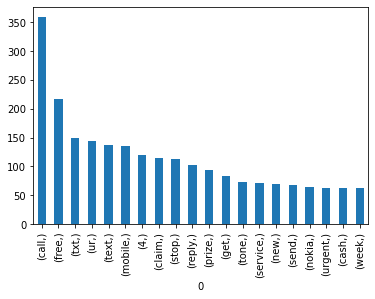

In [70]:
# visualize top 20 spam words
top_20_spam_words = spam_freq.sort_values(ascending=False).head(20)
top_20_spam_words.plot.bar()

In [58]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

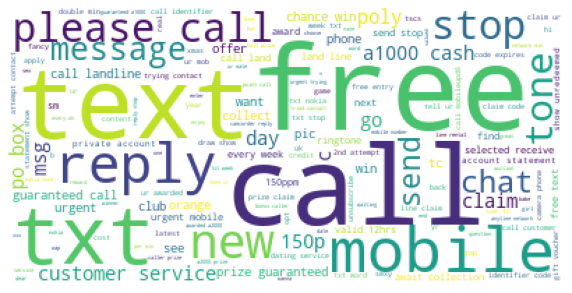

In [65]:
# Generate wordcloud with spam words
img = WordCloud(background_color="white").generate(" ".join(words))
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")

In [100]:
# Bigrams
top_20_spam_bigrams = pd.Series(nltk.ngrams(words, 2)).value_counts().head(20)
top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
dtype: int64

In [101]:
bigram_tuples = top_20_spam_bigrams.index

In [102]:
spam_bigrams_list = []

for bigram in bigram_tuples:
    spam_bigrams_list.append("_".join(bigram))
    
spam_bigrams_list

['please_call',
 'customer_service',
 'po_box',
 'guaranteed_call',
 'a1000_cash',
 'prize_guaranteed',
 'selected_receive',
 'await_collection',
 'chance_win',
 'every_week',
 'send_stop',
 'land_line',
 'urgent_mobile',
 'valid_12hrs',
 'claim_call',
 'prize_claim',
 'account_statement',
 'call_08000930705',
 'sae_tc',
 'free_entry']

(-0.5, 399.5, 199.5, -0.5)

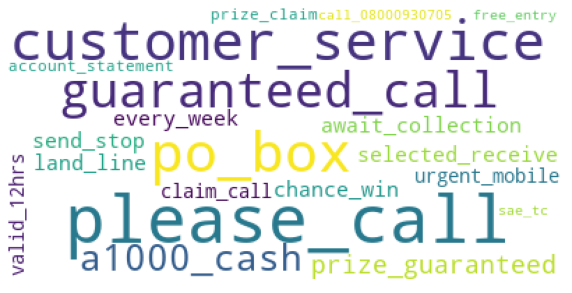

In [103]:
# Generate wordcloud with spam bigrams
img = WordCloud(background_color="white").generate(" ".join(spam_bigrams_list))
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")

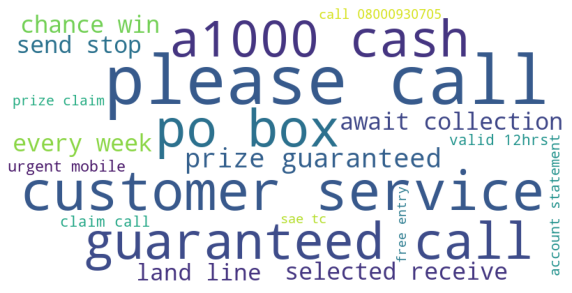

In [105]:
# Generate wordcloud following example from curriculum
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

The results are similar

* Is there any overlap in the bigrams for the spam data and the ham data?
>The only overlap I see is the word "call", but the paired word in the bigram makes the intent different between spam and ham. The ham bigrams seems more personal, with variations of "I" showing up in several ham bigrams, but nothing like that in the spam bigrams. There are also more greetings and sign offs present in the ham bigrams than the spam bigrams.

* Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [109]:
# spam trigrams
top_20_spam_trigrams = pd.Series(nltk.ngrams(words, 3)).value_counts().head(20)
top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

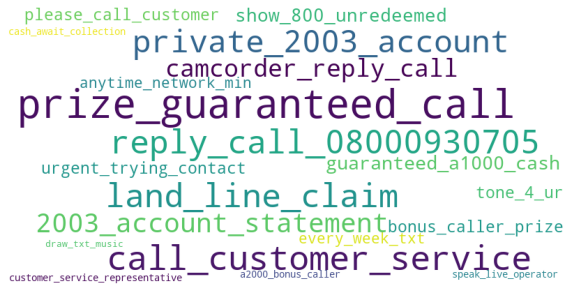

In [111]:
# Generate wordcloud following example from curriculum
data = {k[0] + '_' + k[1] + '_' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [113]:
# acquire and prep the ham data
ham_only_df = spam_df[spam_df.label == "ham"]
ham_only_df

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


In [114]:
ham_only_df.text = ham_only_df.text.apply(prepare.basic_clean)
ham_only_df.text = ham_only_df.text.apply(prepare.tokenize)
ham_only_df.text = ham_only_df.text.apply(prepare.remove_stopwords, extra_words=["r", "u", "2", "ltgt"])
ham_only_df.text = ham_only_df.text.apply(prepare.lemmatize)

ham_only_df

,label,text
id,,
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
3,ham,dun say early hor c already say
4,ham,nah ' think go usf life around though
6,ham,even brother like speak treat like aid patent
...,...,...
5565,ham,huh lei
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion


In [118]:
# join all the words for the text column into a giant string
ham_text = " ".join(ham_only_df.text)

# Create a list of individual words
ham_words = re.sub(r"[^\w\s]", "", ham_text).split()

In [119]:
# ham trigrams
top_20_ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20)
top_20_ham_trigrams.head()

(sorry, call, later)    38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(right, pls, send)      12
dtype: int64

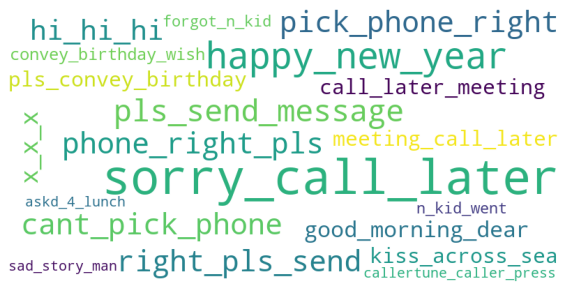

In [120]:
# Generate wordcloud following example from curriculum
data = {k[0] + '_' + k[1] + '_' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()